In [1]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import seaborn as sns

from matplotlib import pyplot as plt


In [2]:
time_resolution = "2week"

data_path = '../network_data'+str(time_resolution)+'/'

c_path = '../network_data'+str(time_resolution)+'/commits/'
e_path = '../network_data'+str(time_resolution)+'/emails/'
mix_path = '../network_data'+str(time_resolution)+'/mix/'
#c_path = './network_data/commits/'

df_tech_overlaps = pd.read_csv("../result_csv/tech_overlaps"+str(time_resolution)+".csv")
df_social_overlaps = pd.read_csv("../result_csv/social_overlaps"+str(time_resolution)+".csv")
df_mix_overlaps = pd.read_csv("../result_csv/mix_overlaps"+str(time_resolution)+".csv")

projects = os.listdir(c_path)
project_names = [x.split('__')[0] for x in projects]
project_names_tech = pd.Series(project_names).drop_duplicates().values

projects = os.listdir(e_path)
project_names = [x.split('__')[0] for x in projects]
project_names_social = pd.Series(project_names).drop_duplicates().values

In [3]:
all_graduated = np.load('../all_graduated.npy').tolist()
#all_graduated = [x.lower() for x in all_graduated]
all_retired = np.load('../all_retired.npy').tolist()
#all_retired = [x.lower() for x in all_retired]

In [4]:
df_tech_overlaps.columns

Index(['Etch', 'Impala', 'Shindig', 'Droids', 'Rya', 'stdcxx', 'OpenWhisk',
       'Wave', 'Ratis', 'REEF',
       ...
       'Nutch', 'Warble', 'Concerted', 'JuiCE',
       'Climate Model Diagnostic Analyzer', 'Kabuki', 'CarbonData', 'RCF',
       'Wicket', 'Beam'],
      dtype='object', length=262)

In [5]:
df_tech_vectors = df_tech_overlaps[:52].replace(-1.0,0.0).values.T

In [6]:
df_tech_vectors.shape

(262, 52)

In [7]:
df_social_vectors = df_social_overlaps[:52].replace(-1.0,0.0).values.T

In [8]:
df_social_vectors.shape

(272, 52)

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage

cluster_tech = linkage(df_tech_vectors, 'ward')

In [10]:
cluster_tech

array([[101.        , 135.        ,   0.        ,   2.        ],
       [189.        , 262.        ,   0.        ,   3.        ],
       [236.        , 263.        ,   0.        ,   4.        ],
       ...,
       [516.        , 519.        ,   5.85743965, 118.        ],
       [517.        , 520.        ,   7.38532824, 138.        ],
       [518.        , 521.        ,  11.50378037, 262.        ]])

In [11]:
def fancy_dendrogram(*args, **kwargs):
	max_d = kwargs.pop('max_d', None)
	if max_d and 'color_threshold' not in kwargs:
		kwargs['color_threshold'] = max_d
	annotate_above = kwargs.pop('annotate_above', 0)

	ddata = dendrogram(*args, **kwargs)

	if not kwargs.get('no_plot', False):
		plt.title('Hierarchical Clustering Dendrogram (truncated)')
		plt.xlabel('sample index or (cluster size)')
		plt.ylabel('distance')
		for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
			x = 0.5 * sum(i[1:3])
			y = d[1]
			if y > annotate_above:
				plt.plot(x, y, 'o', c=c)
				plt.annotate("%.3g" % y, (x, y), xytext=(0, -5), textcoords='offset points', va='top', ha='center')
		if max_d:
			plt.axhline(y=max_d, c='k')
	return ddata

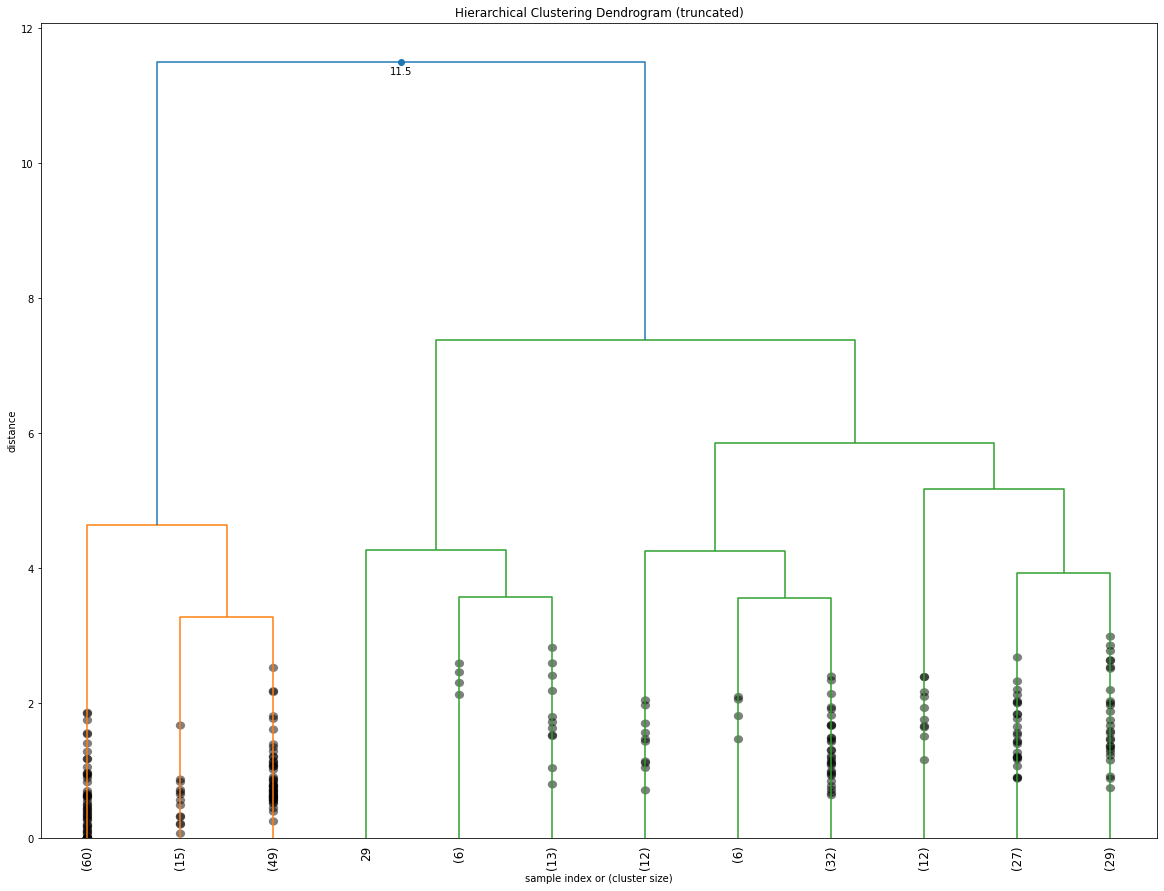

In [12]:
plt.figure(figsize=(20, 15))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
#dendrogram(cluster_tech, truncate_mode='lastp', p=12, show_leaf_counts=False, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
fancy_dendrogram(cluster_tech, truncate_mode='lastp', p=12, leaf_rotation=90., leaf_font_size=12., show_contracted=True, annotate_above=10)
plt.show()

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage

cluster_social = linkage(df_social_vectors, 'ward')

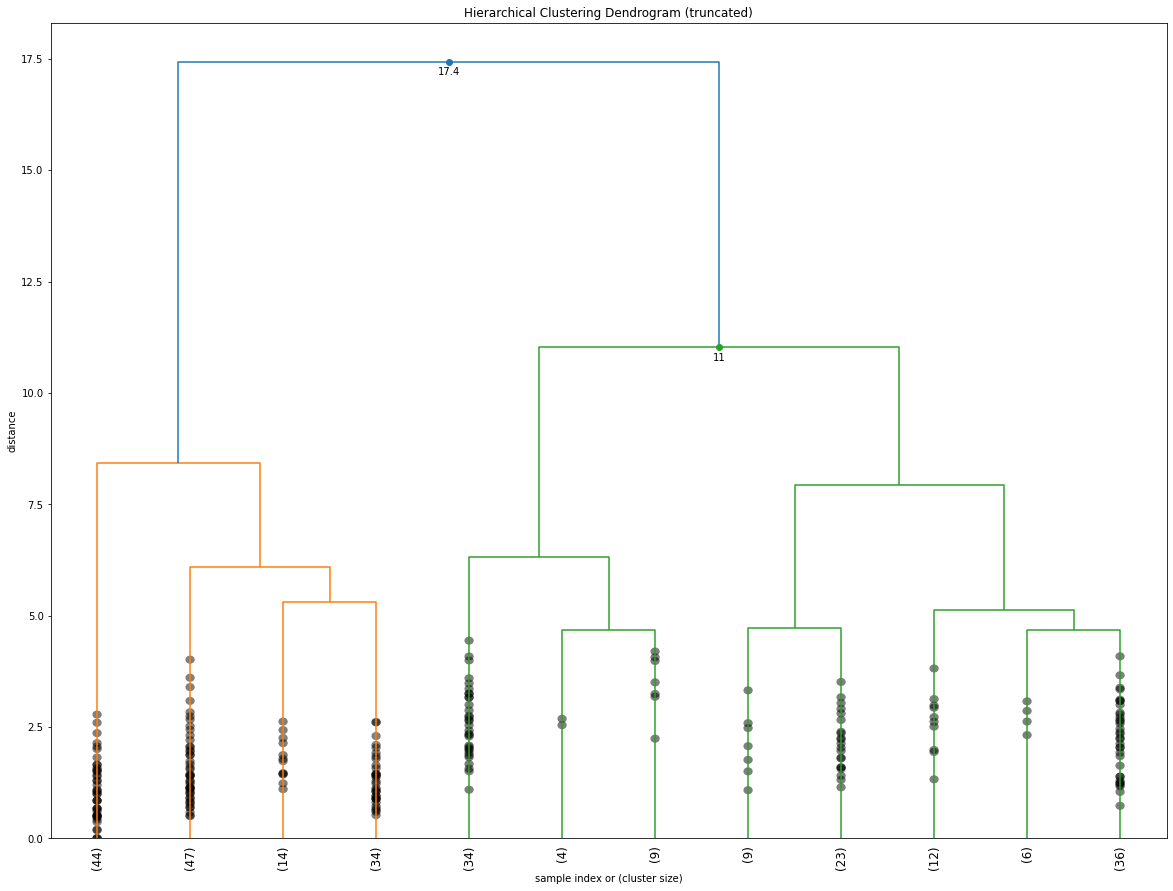

In [14]:
plt.figure(figsize=(20, 15))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
#dendrogram(cluster_social, truncate_mode='lastp', p=12, show_leaf_counts=False, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
fancy_dendrogram(cluster_social, truncate_mode='lastp', p=12, leaf_rotation=90., leaf_font_size=12., show_contracted=True, annotate_above=10)
plt.show()

In [25]:
from scipy.cluster.hierarchy import fcluster
k = 5.5
#clusters_result_tech = fcluster(cluster_tech, k, criterion='maxclust')
clusters_result_tech = fcluster(cluster_tech, k, criterion='distance')
print(clusters_result_tech)

[4 1 4 4 1 2 4 4 1 1 1 1 1 4 4 4 4 3 1 4 3 4 2 4 1 4 4 1 1 2 3 3 1 4 3 1 4
 3 4 3 4 3 1 4 1 4 4 4 1 4 1 3 1 2 3 4 1 3 4 2 1 4 4 4 1 4 1 4 2 4 3 3 3 1
 1 2 2 3 4 1 2 4 3 3 4 4 1 1 4 3 3 4 4 2 1 3 4 3 2 2 4 1 4 4 4 2 2 1 1 1 3
 4 1 3 1 1 4 4 1 3 3 4 4 3 1 4 2 1 1 1 1 4 2 4 1 1 3 3 3 4 3 1 1 4 1 1 3 2
 1 4 2 3 4 1 1 1 1 1 4 1 4 4 1 1 4 4 4 1 1 3 3 2 4 1 1 1 1 3 3 4 1 1 3 4 3
 4 4 1 3 1 1 1 1 1 1 2 3 1 3 1 3 1 4 1 1 4 1 1 1 1 1 1 1 1 1 1 3 1 3 3 1 1
 1 3 1 1 1 1 3 1 1 1 1 3 1 1 1 1 1 1 1 3 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]


In [26]:
from scipy.cluster.hierarchy import fcluster
k = 8
#clusters_result_tech = fcluster(cluster_tech, k, criterion='maxclust')
clusters_result_social = fcluster(cluster_social, k, criterion='distance')
print(clusters_result_social)

[4 3 1 3 2 4 3 3 2 4 3 3 3 2 4 4 4 4 2 2 2 3 4 1 3 1 1 4 3 1 1 2 3 3 4 4 3
 1 2 4 3 4 4 4 4 4 4 2 4 4 2 2 1 2 4 2 4 3 4 4 4 4 4 4 2 2 4 2 1 4 2 4 1 3
 4 4 4 4 3 4 1 3 4 4 4 4 4 3 2 2 4 3 3 1 2 4 3 3 4 4 4 2 4 4 3 2 2 4 2 4 2
 2 4 2 2 4 3 1 1 3 3 3 4 4 4 3 3 4 4 2 1 2 3 4 4 2 3 3 2 4 1 2 3 4 4 4 1 2
 3 2 1 2 2 4 4 3 4 2 2 2 4 4 2 4 1 3 3 2 3 1 1 2 4 3 3 3 2 1 2 1 4 2 4 3 2
 2 2 2 2 2 2 2 2 1 2 4 4 2 3 3 4 2 2 2 1 2 2 2 4 4 4 3 1 2 2 4 4 2 2 4 4 2
 2 1 2 4 2 1 2 2 2 2 1 4 1 2 2 2 4 2 2 2 2 3 1 1 4 1 2 2 2 2 2 2 1 2 1 1 2
 2 1 1 2 2 2 1 1 1 2 1 1 1]


In [27]:
df_tech_results = pd.DataFrame(np.c_[df_tech_vectors,clusters_result_tech])
df_tech_results.index = df_tech_overlaps.columns
df_tech_results = df_tech_results.rename(columns={52:'cluster'})

In [28]:
df_tech_results

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,cluster
Etch,0.181818,0.636364,0.601093,0.237500,0.075000,0.272727,0.400000,0.600000,0.250000,0.250000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
Impala,0.000000,0.000000,0.000000,0.083333,0.060000,0.040000,0.030303,0.015625,0.075472,0.217391,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Shindig,0.450000,0.526882,0.554455,0.346535,0.440000,0.144444,0.166667,0.367925,0.317406,0.286689,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
Droids,0.076923,0.000000,0.250000,0.200000,0.000000,0.000000,0.000000,0.493976,0.250000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
Rya,0.000000,0.000000,0.000000,0.000000,0.153846,0.000000,0.250000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kabuki,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
CarbonData,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
RCF,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Wicket,0.210526,0.371134,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [29]:
df_tech_plot = pd.DataFrame

In [30]:
df_tech_plot = df_tech_results.groupby('cluster').agg('median')

In [31]:
df_tech_plot

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
cluster,,,,,,,,,,,,,,,,,,,,,
1.0,0.119885,0.131466,0.073593,0.051957,0.076149,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2.0,0.461538,0.224747,0.330759,0.355355,0.213095,0.204533,0.332323,0.334936,0.287923,0.268110,...,0.136688,0.186654,0.380952,0.131283,0.254028,0.282878,0.149554,0.202222,0.232972,0.146524
3.0,0.191964,0.212885,0.185714,0.221405,0.250000,0.231914,0.221688,0.120192,0.129121,0.134417,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4.0,0.128388,0.245504,0.260769,0.206383,0.215758,0.238557,0.208108,0.232493,0.181420,0.219502,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


<AxesSubplot:>

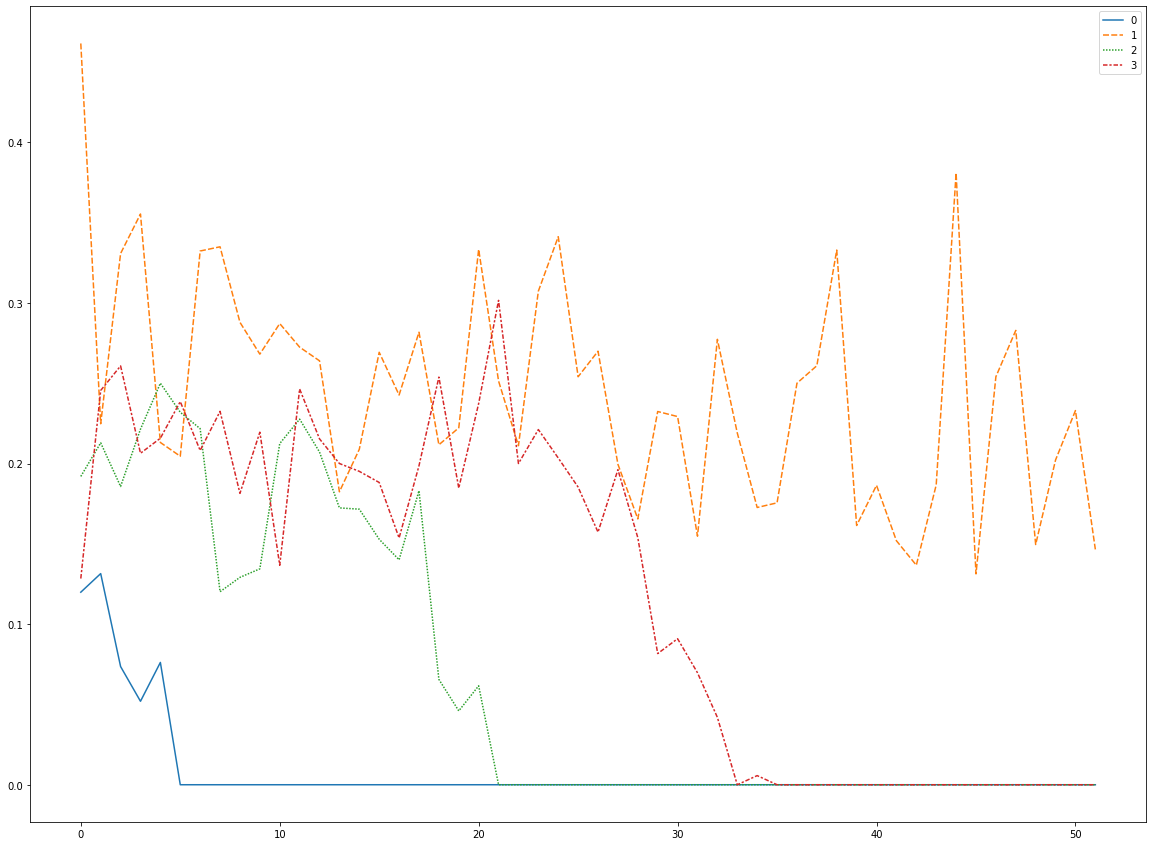

In [32]:
plt.figure(figsize=(20, 15))
sns.lineplot(data= df_tech_plot.values.T)

In [33]:
df_social_results = pd.DataFrame(np.c_[df_social_vectors,clusters_result_social])
df_social_results.index = df_social_overlaps.columns
df_social_results = df_social_results.rename(columns={52:'cluster'})
df_social_plot = df_social_results.groupby('cluster').agg('median')

<AxesSubplot:>

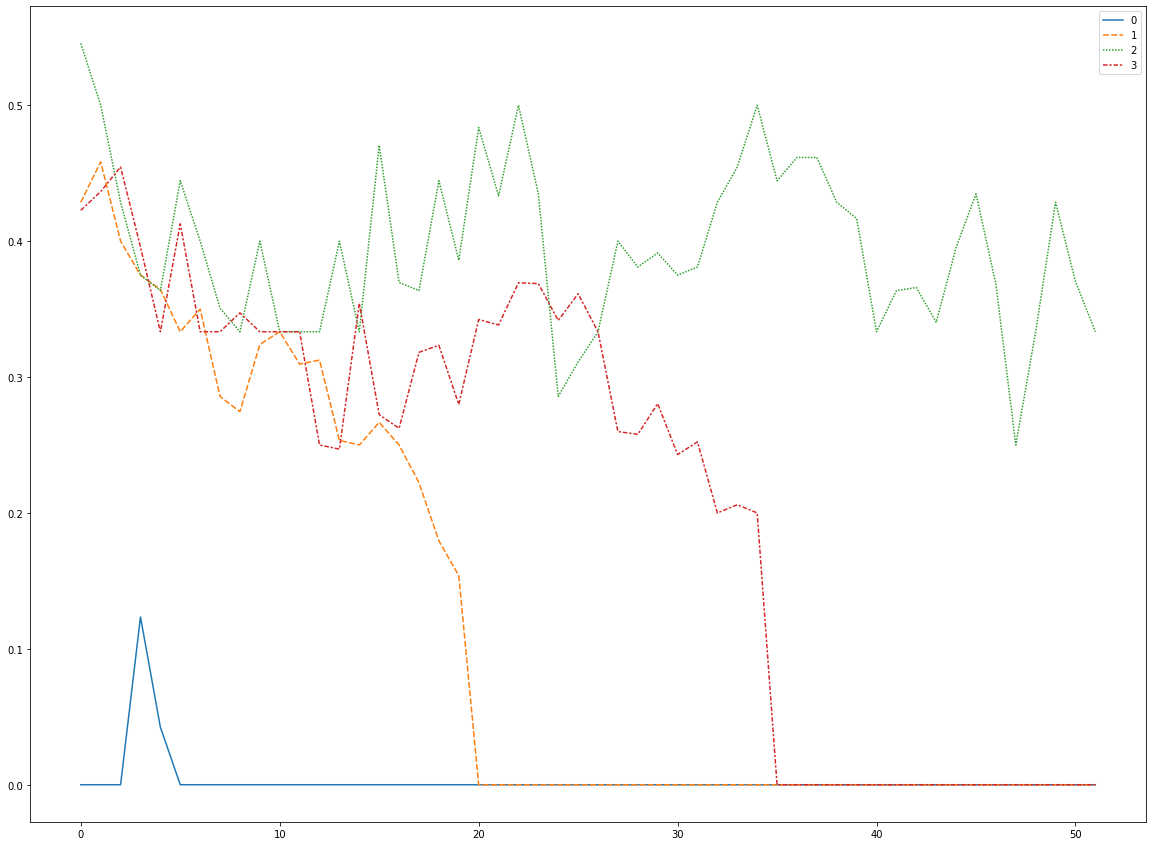

In [34]:
plt.figure(figsize=(20, 15))
sns.lineplot(data= df_social_plot.values.T)